# [SWCON25301] Machine Learning
Teaching Assistant: Suyong Bahk (clapd10@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P3:  NumPy를 이용한 MLP 구현 (10점)

### 학습목표
- MLP Python class를 직접 구현하면서 Deep NN framework의 작동방법을 이해한다.
- 머신러닝 모델의 데이터 준비, 개발, 학습, 검증, 시각화 과정을 이해하고 설명 할 수 있다.
- MLP를 이용하여 문제를 해결함으로써 Perceptron 대비 MLP의 차이점을 이해할 수 있다.

### 실습내용
MLP를 이용하는 Classification model을 구현합니다. <br>

실습은 다음 순서로 진행됩니다. 학생분들께서는 **<구현>** 에 해당하는 부분을 수행해주시면 됩니다.

- S1. MLP 구현 및 분석
    - 1) 실습에서 사용되는 패키지 import
    - 2) 주어진 데이터셋 loading
    - 3) MLP 구현 **<구현>** 
    - 4) MLP 학습
    - 5) MLP 검증
    - 6) MLP 동작 결과 시각화
- S2. Discussion
<br>


### 점수
- MLP 모델 구현: 각 코드별로 2점
- Discussion : 2점

### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.

## S1.  MLP 구현 및 분석

## 1-1) Imports
**수정하지 마세요.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1-2) Loading the Dataset
**수정하지 마세요.** 

데이터셋은 두 개의 class(0, 1)를 갖는 2차원 데이터이며, class0은 0의 값을 가지고 class1은 1의 값을 가집니다.

In [2]:
import random

# 랜덤시드 설정
random.seed(123)
np.random.seed(123)


def twospirals(n_points, noise=0.5):
    """
    Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    return (
        np.concatenate((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
        np.concatenate((np.zeros(n_points), np.ones(n_points))),
    )


X, y = twospirals(500)
print(X[0])
print(X.shape)
print(len(X), len(y))

[ -3.95522859 -10.56938496]
(1000, 2)
1000 1000


### Dataset Split & Visualization

**수정하지 마세요.** 

Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [3]:
# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 800개 까지는 학습용으로 뒤 200개는 테스트용으로 split
X_train = [X[i] for i in idx[:800]]
y_train = [y[i] for i in idx[:800]]
X_test = [X[i] for i in idx[800:]]
y_test = [y[i] for i in idx[800:]]

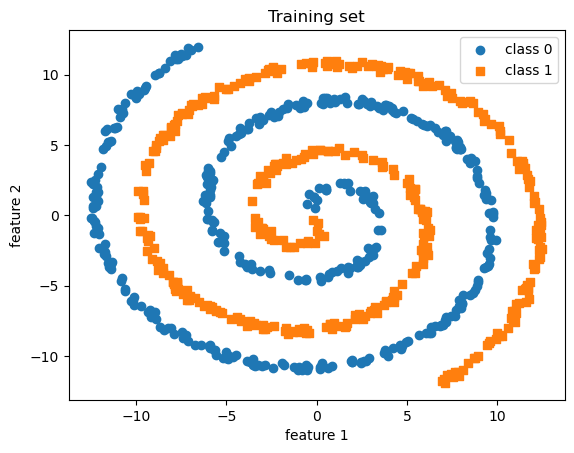

In [4]:
def plot(x, y, title="plot"):
    # 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
    plt.scatter(
        [i[0] for idx, i in enumerate(x) if y[idx] == 0],
        [i[1] for idx, i in enumerate(x) if y[idx] == 0],
        label="class 0",
        marker="o",
    )

    plt.scatter(
        [i[0] for idx, i in enumerate(x) if y[idx] == 1],
        [i[1] for idx, i in enumerate(x) if y[idx] == 1],
        label="class 1",
        marker="s",
    )
    plt.title(title)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.legend()
    plt.show()


plot(X_train, y_train, "Training set")

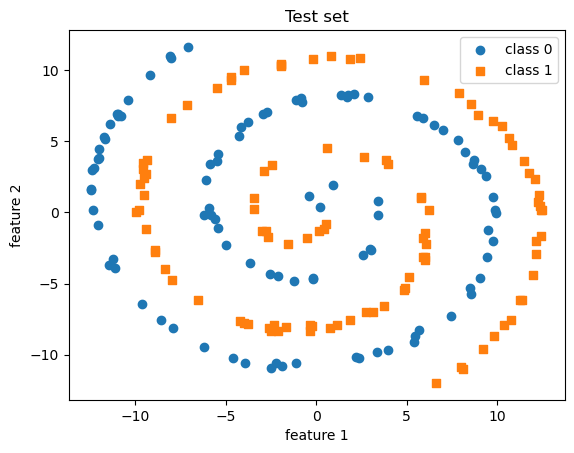

In [5]:
plot(X_test, y_test, "Test set")

## 1-3) MLP 구현
### Layer 설계
각 layer는 **forward 함수**와 **calc_gradient_of_this_layer 함수**를 가집니다.

**forward 함수** 는 이전 layer의 출력을 입력 x로 받아 연산을 수행한 후, 그 결과를 self.y에 저장하고 출력합니다.  
**단,** Linear layer는 추가로 입력 x를 self.x에 저장합니다. 

**calc_gradient_of_this_layer 함수**는 이전 layer에서 계산된 gradient를 입력으로 받아 현재 layer의 derivative를 이용하여 갱신한 gradient를 다음 layer로 역전파합니다.  
**또한,** Linear layer에서는 weight와 bias에 대한 gradient도 계산하여 저장합니다.


Linear layer는 추가로 **update_parameters 함수**를 가집니다.
update_parameters 함수는 앞서 calc_gradient_of_this_layer에서 계산한 derivative를 이용하여 weight와 bias를 갱신하는 역할을 합니다.

In [6]:
# base class, 수정하지 마세요.
class Layer:
    def __init__(self):
        self.y = None

    def forward(self, x):
        self.y = None
        return self.y

    def calc_gradient_of_this_layer(self, gradient_from_prev_layer):
        # backward propagation을 진행하면서,
        # 이전 layer의 gradient를 입력받아 현재 layer의 gradient를 계산합니다.
        gradient_for_next_layer = None
        return gradient_for_next_layer

    def update_parameters(self, lr):
        # weight, bias가 있는 경우에만 해당 layer의 weight와 bias를 update하는 함수를 구현하면 됩니다.
        return


# 활성함수 구현


class ReLU(Layer):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        self.x = x
        self.y = np.where(x > 0, x, 0)
        return self.y

    def calc_gradient_of_this_layer(self, gradient_from_prev_layer):
        derivative_of_relu = np.where(self.x > 0, 1, 0)
        gradient_for_next_layer = gradient_from_prev_layer * derivative_of_relu
        return gradient_for_next_layer


class Tanh(Layer):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        self.y = np.tanh(x)
        return self.y

    def calc_gradient_of_this_layer(self, previous_gradient):
        multiplier = 1 - self.y**2
        self.gradient_of_this_layer = previous_gradient * multiplier
        return self.gradient_of_this_layer


class Sigmoid(Layer):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        self.y = 1 / (1 + np.exp(-x))
        return self.y

    def calc_gradient_of_this_layer(self, gradient_from_prev_layer):
        self.y = np.clip(self.y, 1e-8, 1 - 1e-8)
        derivative_of_sigmoid = self.y * (1 - self.y)
        gradient_for_next_layer = gradient_from_prev_layer * derivative_of_sigmoid
        return gradient_for_next_layer


class LeakyReLU(Layer):
    def __init__(self, slope=0.001):
        super().__init__()
        self.slope = slope

    def forward(self, x):
        self.x = x
        self.y = np.where(x > 0, x, -x * self.slope)
        return self.y

    def calc_gradient_of_this_layer(self, previous_gradient):
        multiplier = np.where(self.x > 0, 1, -self.slope)
        self.gradient_of_this_layer = previous_gradient * multiplier
        return self.gradient_of_this_layer


# 목적함수와 그 gradient 구현


class MSE:
    def calc_loss_and_gradient(self, pred, label):
        loss = np.mean((pred - label) ** 2)

        grad = 2 * (pred - label[None, :])
        return loss, grad


class CrossEntropy:
    def calc_loss_and_gradient(self, pred, label):
        # 0에 log를 취하는 것을 막기 위한 clipping
        pred = np.clip(pred, 1e-8, 1 - 1e-8)

        loss = -np.mean(
            np.sum(label * np.log(pred), axis=1)
            # <your code>
        )

        grad = (pred - label[None, :]) / (pred * (1 - pred))
        return loss, grad


# Linear layer 구현


class Linear(Layer):
    def __init__(self, num_in_features, num_out_features):
        super().__init__()
        self.weights = np.random.randn(num_in_features, num_out_features).T
        self.weights *= np.sqrt(2 / (num_in_features * num_out_features))
        self.bias = np.zeros(num_out_features)[:, None]
        self.x = None
        self.gradient_weight = None
        self.gradient_bias = None

    def forward(self, x):
        self.x = x
        # self.y = # <your code>
        self.y = self.weights @ x + self.bias
        return self.y

    def calc_gradient_of_this_layer(self, gradient_from_prev_layer):
        # array.T는 transposed array를 반환합니다.
        # ex) self.x.T : transposed array of self.x

        # self.gradient_weight = # <your code>
        # print(np.shape(self.x))
        # print(np.shape(gradient_from_prev_layer))
        # print(np.shape(self.x.T))

        self.gradient_weight = gradient_from_prev_layer @ self.x.T
        # print(np.shape(self.gradient_weight))
        # print(np.shape(self.weights))
        # print("-------")
        # self.gradient_weight = np.matmul(self.x.T, gradient_from_prev_layer)

        self.gradient_bias = gradient_from_prev_layer

        # gradient_for_next_layer = # <your code>
        # print(np.shape(self.weights.T))
        # print(np.shape(gradient_from_prev_layer))
        gradient_for_next_layer = self.weights.T @ gradient_from_prev_layer
        # gradient_for_next_layer = np.matmul(self.weights.T, gradient_from_prev_layer)
        return gradient_for_next_layer

    def update_parameters(self, lr):
    #     print(np.shape(self.weights))
    #     print(np.shape(self.gradient_weight))
        self.weights -= lr * self.gradient_weight
        self.bias -= lr * self.gradient_bias.sum(1)[:, None]

**수정하지 마세요.**

In [7]:
class MLP:
    def __init__(
        self,
        num_input_feature=2,
        num_hidden_feature=256,
        num_out_feature=1,
        learning_rate=0.01,
        batch_size=4,
    ):
        self.batch_size = batch_size
        self.lr = learning_rate
        self.layers = [
            Linear(num_input_feature, num_hidden_feature),
            ReLU(),
            Linear(num_hidden_feature, num_hidden_feature),
            ReLU(),
            Linear(num_hidden_feature, 3),
            ReLU(),
            Linear(3, num_out_feature),
            Sigmoid(),
        ]
        self.loss = CrossEntropy()

    def visualize_feature(self, x, y):
        feature = np.array(x).T
        y = np.array(y, dtype=bool)
        for layer in self.layers[:-2]:
            feature = layer.forward(feature)
        x_ = feature[0].T[:]
        y_ = feature[1].T[:]
        z_ = feature[2].T[:]
        x_0 = x_[~y]
        y_0 = y_[~y]
        z_0 = z_[~y]
        x_1 = x_[y]
        y_1 = y_[y]
        z_1 = z_[y]

        fig = plt.figure()
        ax = fig.add_subplot(projection="3d")

        ax.scatter(x_0, y_0, z_0, marker="o")
        ax.scatter(x_1, y_1, z_1, marker="^")

        ax.set_xlabel("projected_feat_1")
        ax.set_ylabel("projected_feat_2")
        ax.set_zlabel("projected_feat_3")
        ax.legend(["class 0", "class 1"])
        plt.show()

    def shuffle_datasets(self, a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]

    # 모델의 출력을 반환하는 함수
    def forward(self, x):
        feature = x
        for layer in self.layers:
            feature = layer.forward(feature)
        return feature

    def calc_loss_and_gradient(self, pred, label):
        m = self.batch_size

        loss, current_gradient = self.loss.calc_loss_and_gradient(pred, label)
        current_gradient = current_gradient / m

        # gradient backpropagation
        for layer in reversed(self.layers):
            current_gradient = layer.calc_gradient_of_this_layer(current_gradient) / m

    def update_parameters(self):
        for layer in self.layers:
            layer.update_parameters(self.lr)

    def predict(self, feature):
        feature = np.array(feature)
        feature = self.forward(feature.T)
        return np.round(feature)

    def calc_accuracy(self, x, y):
        x = np.array(x)
        y = np.array(y)
        pred = self.predict(x)

        # 정답이면 True, 오답이면 False를 출력하는 array 생성
        correct_predictions = pred == y.T

        # True 갯수 계산
        counts_true = np.count_nonzero(correct_predictions)
        total_nums = np.size(pred)

        return counts_true / total_nums * 100

    def fit(self, x_train, y_train, epochs):
        x_arr = np.array(x_train)
        y_arr = np.array(y_train)
        epoch_nums = []
        accuracies = []
        losses = []
        # epochs 만큼 학습
        for e in range(epochs):
            x, y = self.shuffle_datasets(x_arr, y_arr)

            # 배치 크기씩 data 분할
            num_batches = len(x) // self.batch_size

            # batch size 크기의 배수가 아닌 나머지 training example 개수
            remain = len(x) % self.batch_size

            x = x[remain:]  # remain을 제외한 training example만 사용
            y = y[remain:]
            x = np.array_split(x, num_batches)  # 배치 크기씩 데이터 분할
            y = np.array_split(y, num_batches)

            # 각 배치마다 파라미터 업데이트
            for batch_x_y in zip(x, y):  # 배치 하나씩 학습
                batch_x, batch_y = batch_x_y

                pred = self.forward(batch_x.T)

                self.calc_loss_and_gradient(pred, batch_y.T)
                self.update_parameters()

            accuracy = self.calc_accuracy(x_arr, y_arr)
            print(f"Epoch {e} train accuracy : {accuracy:.2f}%")
            epoch_nums += [e]
            accuracies += [accuracy]

            if accuracy == 100:
                print("Stopped training.")
                break
        plt.plot(epoch_nums, accuracies)
        plt.xlabel("epoch")
        plt.ylabel("accuracy (%)")
        plt.title("Training accuracies")

## 1-4) MLP 학습

**수정하지 마세요.**
작성한 MLP를 Trainset을 이용해 **최대** 200 epoch 학습하고 학습된 weight, bias를 print합니다.

Epoch 0 train accuracy : 49.75%
Epoch 1 train accuracy : 50.25%
Epoch 2 train accuracy : 49.75%
Epoch 3 train accuracy : 50.25%
Epoch 4 train accuracy : 49.75%
Epoch 5 train accuracy : 54.12%
Epoch 6 train accuracy : 55.25%
Epoch 7 train accuracy : 58.25%
Epoch 8 train accuracy : 56.00%
Epoch 9 train accuracy : 57.00%
Epoch 10 train accuracy : 56.75%
Epoch 11 train accuracy : 55.25%
Epoch 12 train accuracy : 57.63%
Epoch 13 train accuracy : 58.50%
Epoch 14 train accuracy : 56.50%
Epoch 15 train accuracy : 55.38%
Epoch 16 train accuracy : 58.88%
Epoch 17 train accuracy : 56.38%
Epoch 18 train accuracy : 58.63%
Epoch 19 train accuracy : 60.88%
Epoch 20 train accuracy : 56.50%
Epoch 21 train accuracy : 57.00%
Epoch 22 train accuracy : 57.00%
Epoch 23 train accuracy : 56.88%
Epoch 24 train accuracy : 56.50%
Epoch 25 train accuracy : 58.38%
Epoch 26 train accuracy : 56.62%
Epoch 27 train accuracy : 58.13%
Epoch 28 train accuracy : 57.88%
Epoch 29 train accuracy : 58.25%
Epoch 30 train accur

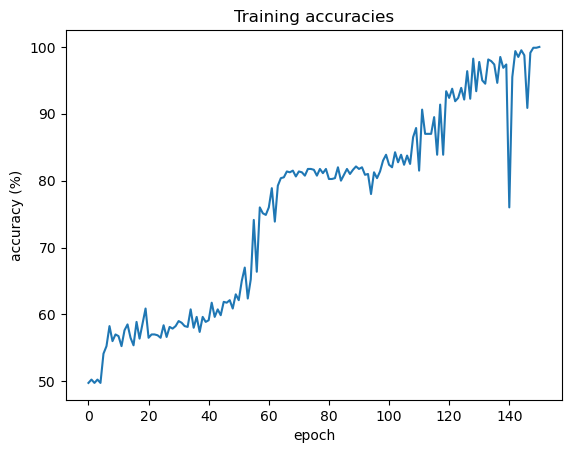

In [8]:
mlp = MLP(learning_rate=1, batch_size=4)  # 위에서 구현한 MLP 모델 정의
mlp.fit(X_train, y_train, 200)  # 최대 200 epoch 학습

## 1-5) 모델 평가
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

In [9]:
# Train dataset에서 성능 평가
train_acc = mlp.calc_accuracy(X_train, y_train)
print("Train set accuracy: %.2f%%" % (train_acc))

Train set accuracy: 100.00%


In [10]:
# Test dataset에서 성능 평가
test_acc = mlp.calc_accuracy(X_test, y_test)
print("Test set accuracy: %.2f%%" % (test_acc))

Test set accuracy: 99.50%


## 1-6) MLP 동작 결과 시각화
Test set에 대한 MLP 동작 결과를 정답과 함께 비교합니다.

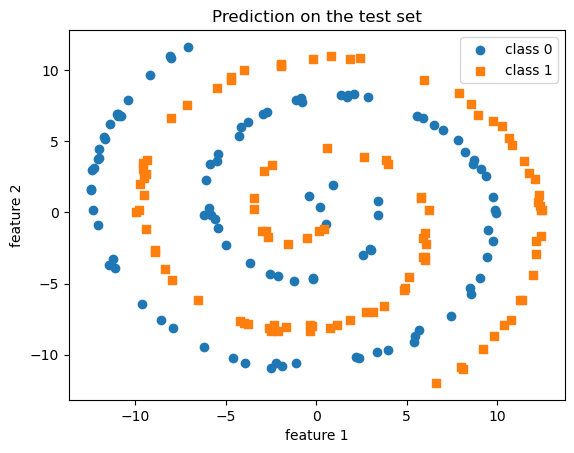

In [11]:
y_pred = list(mlp.predict(X_test).T)
plot(X_test, y_pred, "Prediction on the test set")

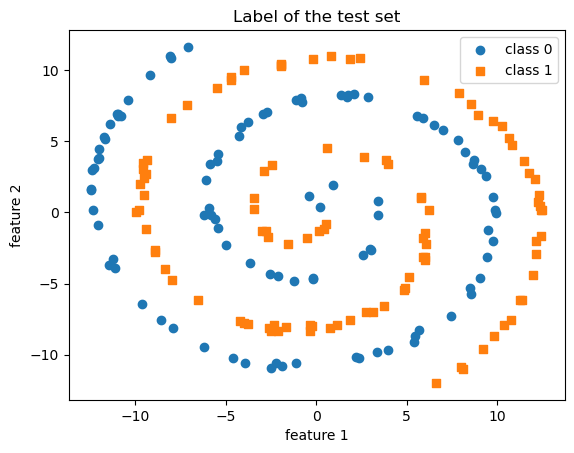

In [12]:
plot(X_test, y_test, "Label of the test set")

## S2. Discussion

**본 실습과제의 MLP는 은닉층을 이용하여 변환된 공간에 있는 특징들에 대해 logistic regression을 수행한 것으로 해석할 수 있습니다.**  
**마지막 은닉층의 출력 특징들을 시각화해 봅시다.**

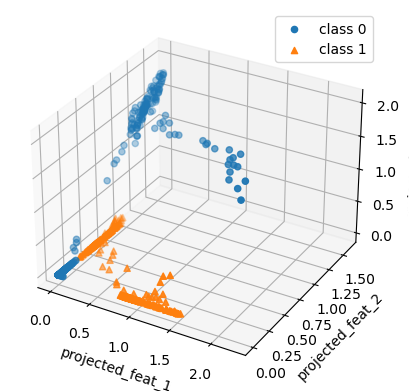

In [13]:
mlp.visualize_feature(X_train, y_train)

**시각화한 결과를 바탕으로 MLP의 특징에 대해 설명해 보세요.**

(여기에 답안 작성)

위의 그래프는 mlp모델이 두 클래스의 데이터를 어떻게 분리하는지 시각화한것으로, 클래스 0은 파란색 점으로, 클래스 1은 주황색 삼각형으로 표시되어 있음. 그래프는 mlp의 은닉층이 데이터를 변환한 후의 특징공간을 나타냄. 데이터의 클래스가 겹치지 않게 표현된 것을 보아 모델이 특징들을 클래스가 잘 구별되도록 경계를 형성한것음 알 수 있음. 

---

**(작성하지 않아도 감점 없음)**  
**주어진 MLP의 세팅 이외에 더 학습이 빠르게 수렴하는 세팅이 있을까요? (은닉층의 개수 및 가중치의 개수 등, 활성함수의 변경)**  
**Loss function으로 MSE와 Cross Entropy를 사용하는 것은 어떤 차이가 있을까요?**  
**자유롭게 실험해 보시고 관찰한 결과를 적어 보세요. 수고하셨습니다.**

(여기에 답안 작성)